# Looking at power spectrum: Fisher errorbars and sim measurements

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
from glob import glob

import numpy as np
import scipy.linalg as la
import datetime
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

import h5py

import ps_plot_utils as psu

In [2]:
# Set directories containing simulation outputs
sim_out_dir = 'sim_output/'
tel_dir = os.path.join(sim_out_dir, 'products')
nosvd_tel_dir = os.path.join(sim_out_dir, 'products_nosvd')

## Base simulation

### Fisher errors on 2d power spectrum

/scratch/sforeman/ch_scripts/sim_example/ps_plot_utils.py:111: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax = plt.imshow(


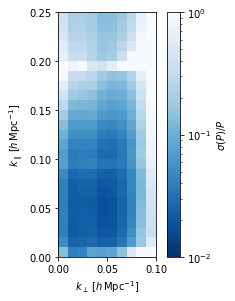

In [3]:
fisher_file = os.path.join(tel_dir, 'bt/dk10_0.1/ps10_0.1', 'fisher.hdf5')

plt.figure(figsize=(4,4.5))
psu.plot_2d_fisher(
    fisher_file, 
    '', 
    'minimum_variance',
    cmin = 0.01, 
    cmax = 1,
    cmap='Blues_r'
)

### 2d power spectrum, normalized by Fisher errorbars

This is actually the deviations from the fiducial power spectrum (e.g. 0 = perfect, 1 = deviation equal to Fisher errorbar in that bin)

/scratch/sforeman/ch_scripts/sim_example/ps_plot_utils.py:194: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax = plt.imshow(


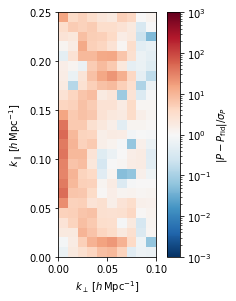

In [4]:
ps_file = os.path.join(sim_out_dir, 'meas', 'ps_dk10_0.1_gnoise_21cm_and_fg.h5')
fisher_file = os.path.join(tel_dir, 'bt/dk10_0.1/ps10_0.1', 'fisher.hdf5')

plt.figure(figsize=(4,4.5))
psu.plot_fishernormed_measured_ps(
    ps_file,
    fisher_file,
    'minimum_variance',
    '', 
    25,
    10,
    cmin = 0.001, 
    cmax = 1000,
    cmap='RdBu_r',
    plot_abs=True
)

## With beam perturbations

### 2d power spectrum, normalized by Fisher errorbars

This is actually the deviations from the fiducial power spectrum (e.g. 0 = perfect, 1 = deviation equal to Fisher errorbar in that bin)

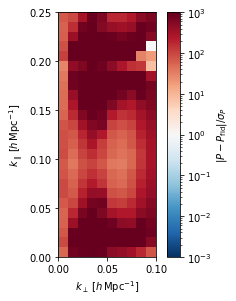

In [5]:
ps_file = os.path.join(sim_out_dir, 'meas', 'ps_dk10_0.1_pert_std0.001_gnoise_21cm_and_fg.h5')
fisher_file = os.path.join(tel_dir, 'bt/dk10_0.1/ps10_0.1', 'fisher.hdf5')

plt.figure(figsize=(4,4.5))
psu.plot_fishernormed_measured_ps(
    ps_file,
    fisher_file,
    'minimum_variance',
    '', 
    25,
    10,
    cmin = 0.001, 
    cmax = 1000,
    cmap='RdBu_r',
    plot_abs=True
)

## No-SVD KL filtering

### Fisher errors on 2d power spectrum

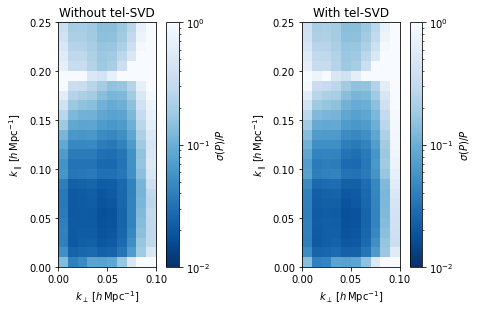

In [6]:
plt.figure(figsize=(4*2,4.5))

plt.subplot(121)

fisher_file = os.path.join(nosvd_tel_dir, 'bt/dk10_0.1/ps10_0.1', 'fisher.hdf5')
psu.plot_2d_fisher(
    fisher_file, 
    'Without tel-SVD', 
    'minimum_variance',
    cmin = 0.01, 
    cmax = 1,
    cmap='Blues_r'
)

plt.subplot(122)

fisher_file = os.path.join(tel_dir, 'bt/dk10_0.1/ps10_0.1', 'fisher.hdf5')
psu.plot_2d_fisher(
    fisher_file, 
    'With tel-SVD', 
    'minimum_variance',
    cmin = 0.01, 
    cmax = 1,
    cmap='Blues_r'
)

### 2d power spectrum, normalized by Fisher errorbars

This is actually the deviations from the fiducial power spectrum (e.g. 0 = perfect, 1 = deviation equal to Fisher errorbar in that bin)

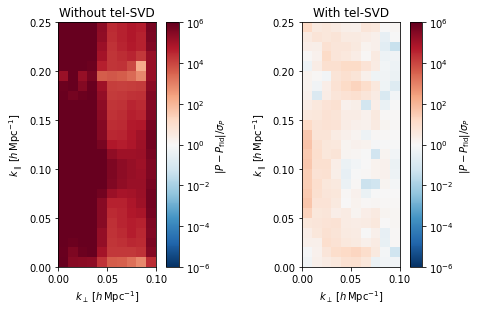

In [7]:
plt.figure(figsize=(4*2,4.5))

plt.subplot(121)
ps_file = os.path.join(sim_out_dir, 'meas_nosvd', 'ps_dk10_0.1_gnoise_21cm_and_fg.h5')
fisher_file = os.path.join(nosvd_tel_dir, 'bt/dk10_0.1/ps10_0.1', 'fisher.hdf5')

psu.plot_fishernormed_measured_ps(
    ps_file,
    fisher_file,
    'minimum_variance',
    'Without tel-SVD', 
    25,
    10,
    cmin = 1e-6, 
    cmax = 1e6,
    cmap='RdBu_r',
    plot_abs=True
)

plt.subplot(122)       
ps_file = os.path.join(sim_out_dir, 'meas', 'ps_dk10_0.1_gnoise_21cm_and_fg.h5')
fisher_file = os.path.join(tel_dir, 'bt/dk10_0.1/ps10_0.1', 'fisher.hdf5')

psu.plot_fishernormed_measured_ps(
    ps_file,
    fisher_file,
    'minimum_variance',
    'With tel-SVD', 
    25,
    10,
    cmin = 1e-6, 
    cmax = 1e6,
    cmap='RdBu_r',
    plot_abs=True
)